In [1]:
# Importing libraries and the CSV file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Reason for lefting job.csv')
df.columns = ['City', 'Gender', 'Experience', 'Education Status', 'Field', 'Company Size','Company Type','Count of previous jobs', 'Training Hours', 'Left job']
print(df.head())

       City Gender               Experience Education Status            Field  \
0  city_103   Male  Has relevent experience         Graduate             STEM   
1   city_40   Male   No relevent experience         Graduate             STEM   
2   city_21    NaN   No relevent experience         Graduate             STEM   
3  city_115    NaN   No relevent experience         Graduate  Business Degree   
4  city_162   Male  Has relevent experience          Masters             STEM   

  Company Size    Company Type Count of previous jobs  Training Hours  \
0          NaN             NaN                      1              36   
1        50-99         Pvt Ltd                     >4              47   
2          NaN             NaN                  never              83   
3          NaN         Pvt Ltd                  never              52   
4        50-99  Funded Startup                      4               8   

   Left job  
0       1.0  
1       0.0  
2       0.0  
3       1.0  
4   

In [4]:
# Looking at the size of the dataframe

print(df.shape)

(19158, 10)


In [5]:
# Checking for NULL values

print(df.isnull().sum())

City                         0
Gender                    4508
Experience                   0
Education Status           460
Field                     2813
Company Size              5938
Company Type              6140
Count of previous jobs     423
Training Hours               0
Left job                     0
dtype: int64


In [6]:
# Checking the percentage of NULL values

print(df.isnull().mean()*100)

City                       0.000000
Gender                    23.530640
Experience                 0.000000
Education Status           2.401086
Field                     14.683161
Company Size              30.994885
Company Type              32.049274
Count of previous jobs     2.207955
Training Hours             0.000000
Left job                   0.000000
dtype: float64


In [7]:
# I used 'ffill' for it to be more random. Using mode would make columns have more of the same value
# Dropping the rest of the rows

df['Gender']= df['Gender'].fillna(method='ffill')
df['Field']= df['Field'].fillna(method='ffill')
df['Company Size']= df['Company Size'].fillna(method='ffill')
df['Company Type']= df['Company Type'].fillna(method='ffill')
df = df.dropna()
print(df.head())

       City Gender               Experience Education Status            Field  \
1   city_40   Male   No relevent experience         Graduate             STEM   
2   city_21   Male   No relevent experience         Graduate             STEM   
3  city_115   Male   No relevent experience         Graduate  Business Degree   
4  city_162   Male  Has relevent experience          Masters             STEM   
5  city_176   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs  Training Hours  \
1        50-99         Pvt Ltd                     >4              47   
2        50-99         Pvt Ltd                  never              83   
3        50-99         Pvt Ltd                  never              52   
4        50-99  Funded Startup                      4               8   
5        50-99  Funded Startup                      1              24   

   Left job  
1       0.0  
2       0.0  
3       1.0  
4       0.0  
5   

In [8]:
# There are no more NULL values

print(df.isnull().sum())

City                      0
Gender                    0
Experience                0
Education Status          0
Field                     0
Company Size              0
Company Type              0
Count of previous jobs    0
Training Hours            0
Left job                  0
dtype: int64


In [9]:
# Dropping the first column. It isn't useful for the analysis

df = df.drop(['City'], axis=1)

In [10]:
# Dataframe looks like this now

print(df.head())
print(df.shape)

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs  Training Hours  \
1        50-99         Pvt Ltd                     >4              47   
2        50-99         Pvt Ltd                  never              83   
3        50-99         Pvt Ltd                  never              52   
4        50-99  Funded Startup                      4               8   
5        50-99  Funded Startup                      1              24   

   Left job  
1       0.0  
2       0.0  
3       1.0  
4       0.0  
5       1.0  
(18311, 9)


In [11]:
# Checking the data types

print(df.dtypes)

Gender                     object
Experience                 object
Education Status           object
Field                      object
Company Size               object
Company Type               object
Count of previous jobs     object
Training Hours              int64
Left job                  float64
dtype: object


In [12]:
# Making 'Left job' int

df['Left job']= df['Left job'].astype(int)

In [13]:
# Making 'Training Hours' column categorical

df['Training Hours']=pd.cut(df['Training Hours'],bins=[0,50,100,150,1000],labels=['0-50','50-100','100-150','150+'])
df['Training Hours']= df['Training Hours'].astype('str')
print(df.head())

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs Training Hours  Left job  
1        50-99         Pvt Ltd                     >4           0-50         0  
2        50-99         Pvt Ltd                  never         50-100         0  
3        50-99         Pvt Ltd                  never         50-100         1  
4        50-99  Funded Startup                      4           0-50         0  
5        50-99  Funded Startup                      1           0-50         1  


In [14]:
# Checking the data types again

print(df.dtypes)

Gender                    object
Experience                object
Education Status          object
Field                     object
Company Size              object
Company Type              object
Count of previous jobs    object
Training Hours            object
Left job                   int32
dtype: object


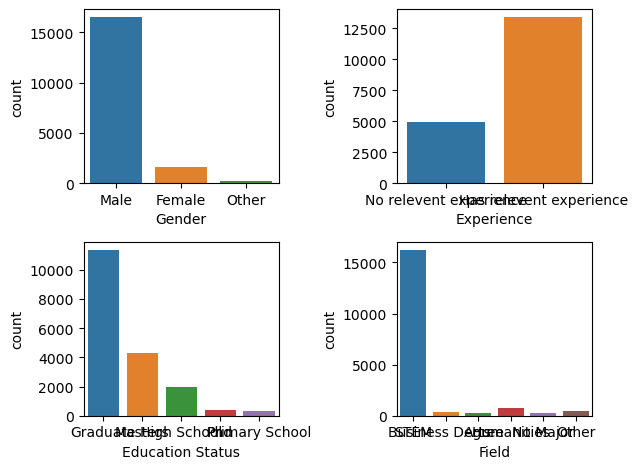

In [15]:
#Looking at count of each category in each column

fig, ax=plt.subplots(2,2)
sns.countplot(x='Gender', data=df, ax=ax[0,0])
sns.countplot(data=df, x='Experience', ax=ax[0,1])
sns.countplot(data=df, x='Education Status', ax=ax[1,0])
sns.countplot(data=df,x='Field', ax=ax[1,1])

plt.tight_layout()

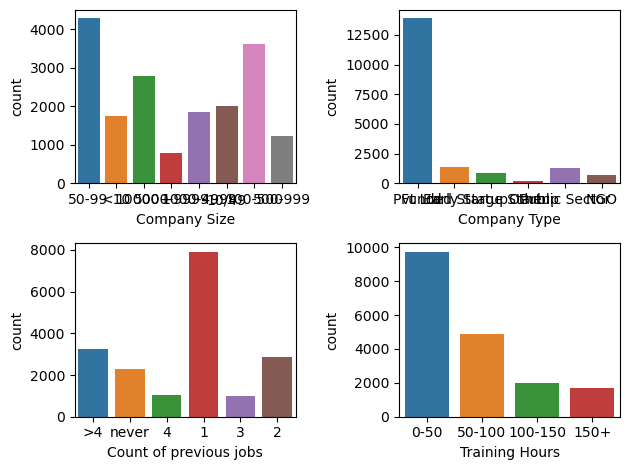

In [16]:
fig, ax=plt.subplots(2,2)
sns.countplot(data=df, x='Company Size', ax=ax[0,0])
sns.countplot(data=df, x='Company Type', ax=ax[0,1])
sns.countplot(data=df, x='Count of previous jobs', ax=ax[1,0])
sns.countplot(data=df, x='Training Hours', ax=ax[1,1])

plt.tight_layout()

<AxesSubplot:xlabel='Left job', ylabel='count'>

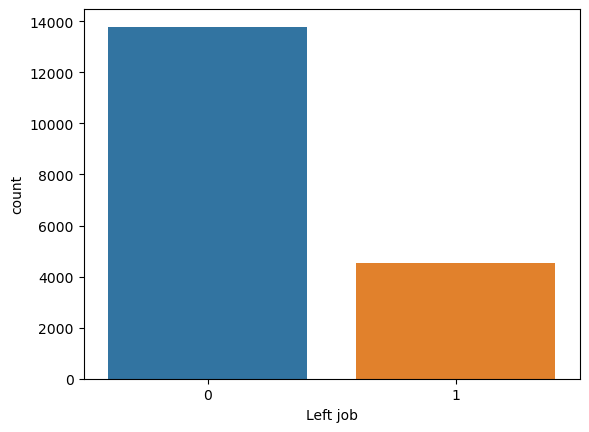

In [17]:
sns.countplot(data=df, x='Left job')

In [18]:
# Getting names of ordinal categories

df['Education Status'].value_counts()

Graduate          11367
Masters            4285
High School        1953
Phd                 407
Primary School      299
Name: Education Status, dtype: int64

In [19]:
df['Company Size'].value_counts()

50-99        4290
100-500      3610
10000+       2788
10/49        2009
1000-4999    1856
<10          1751
500-999      1225
5000-9999     782
Name: Company Size, dtype: int64

In [20]:
df['Count of previous jobs'].value_counts()

1        7913
>4       3238
2        2860
never    2274
4        1020
3        1006
Name: Count of previous jobs, dtype: int64

In [21]:
df['Training Hours'].value_counts()

0-50       9735
50-100     4876
100-150    1997
150+       1703
Name: Training Hours, dtype: int64

In [22]:
# Using mapping to encode these columns

edu_mapping = {"Primary School":0, "High School":1, "Graduate":2, "Masters":3, "Phd":4}
df['Education_status'] = df['Education Status'].map(edu_mapping)
print(df.head())

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs Training Hours  \
1        50-99         Pvt Ltd                     >4           0-50   
2        50-99         Pvt Ltd                  never         50-100   
3        50-99         Pvt Ltd                  never         50-100   
4        50-99  Funded Startup                      4           0-50   
5        50-99  Funded Startup                      1           0-50   

   Left job  Education_status  
1         0                 2  
2         0                 2  
3         1                 2  
4         0 

In [23]:
comp_mapping = {"<10":0, "10/49":1, "50-99":2, "100-500":3, "500-999":4, "1000-4999":5, "5000-9999":6, "10000+":7}
df['Company_size'] = df['Company Size'].map(comp_mapping)
print(df.head())

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs Training Hours  \
1        50-99         Pvt Ltd                     >4           0-50   
2        50-99         Pvt Ltd                  never         50-100   
3        50-99         Pvt Ltd                  never         50-100   
4        50-99  Funded Startup                      4           0-50   
5        50-99  Funded Startup                      1           0-50   

   Left job  Education_status  Company_size  
1         0                 2             2  
2         0                 2             2  
3 

In [24]:
count_mapping = {"never":0, '1':1, '2':2, '3':3, '4':4, '>4':5}
df['Count_of_previous_jobs'] = df['Count of previous jobs'].map(count_mapping)
print(df.head())

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs Training Hours  \
1        50-99         Pvt Ltd                     >4           0-50   
2        50-99         Pvt Ltd                  never         50-100   
3        50-99         Pvt Ltd                  never         50-100   
4        50-99  Funded Startup                      4           0-50   
5        50-99  Funded Startup                      1           0-50   

   Left job  Education_status  Company_size  Count_of_previous_jobs  
1         0                 2             2                       5  


In [25]:
train_mapping = {"0-50":0, '50-100':1, '2':2, '100-150':3, '150+':4}
df['Training_hours'] = df['Training Hours'].map(train_mapping)
print(df.head())

  Gender               Experience Education Status            Field  \
1   Male   No relevent experience         Graduate             STEM   
2   Male   No relevent experience         Graduate             STEM   
3   Male   No relevent experience         Graduate  Business Degree   
4   Male  Has relevent experience          Masters             STEM   
5   Male  Has relevent experience         Graduate             STEM   

  Company Size    Company Type Count of previous jobs Training Hours  \
1        50-99         Pvt Ltd                     >4           0-50   
2        50-99         Pvt Ltd                  never         50-100   
3        50-99         Pvt Ltd                  never         50-100   
4        50-99  Funded Startup                      4           0-50   
5        50-99  Funded Startup                      1           0-50   

   Left job  Education_status  Company_size  Count_of_previous_jobs  \
1         0                 2             2                       5  

In [26]:
df['Training_hours']= df['Training_hours'].astype(int)

In [27]:
print(df.dtypes)

Gender                    object
Experience                object
Education Status          object
Field                     object
Company Size              object
Company Type              object
Count of previous jobs    object
Training Hours            object
Left job                   int32
Education_status           int64
Company_size               int64
Count_of_previous_jobs     int64
Training_hours             int32
dtype: object


In [28]:
# Using the get_dummies function for other rows

df_cat = pd.get_dummies(df[['Gender','Experience','Field', 'Company Type']], drop_first=True)

In [29]:
print(df_cat.head())

   Gender_Male  Gender_Other  Experience_No relevent experience  \
1            1             0                                  1   
2            1             0                                  1   
3            1             0                                  1   
4            1             0                                  0   
5            1             0                                  0   

   Field_Business Degree  Field_Humanities  Field_No Major  Field_Other  \
1                      0                 0               0            0   
2                      0                 0               0            0   
3                      1                 0               0            0   
4                      0                 0               0            0   
5                      0                 0               0            0   

   Field_STEM  Company Type_Funded Startup  Company Type_NGO  \
1           1                            0                 0   
2           1     

In [30]:
# Copying previous rows to categorical dataframe

df_cat['Education_status'] = df[['Education_status']].copy()
df_cat['Company_size'] = df[['Company_size']].copy()
df_cat['Count_of_previous_jobs'] = df[['Count_of_previous_jobs']].copy()
df_cat['Training_hours'] = df[['Training_hours']].copy()

print(df_cat.head())

   Gender_Male  Gender_Other  Experience_No relevent experience  \
1            1             0                                  1   
2            1             0                                  1   
3            1             0                                  1   
4            1             0                                  0   
5            1             0                                  0   

   Field_Business Degree  Field_Humanities  Field_No Major  Field_Other  \
1                      0                 0               0            0   
2                      0                 0               0            0   
3                      1                 0               0            0   
4                      0                 0               0            0   
5                      0                 0               0            0   

   Field_STEM  Company Type_Funded Startup  Company Type_NGO  \
1           1                            0                 0   
2           1     

In [31]:
print(df_cat.dtypes)

Gender_Male                          uint8
Gender_Other                         uint8
Experience_No relevent experience    uint8
Field_Business Degree                uint8
Field_Humanities                     uint8
Field_No Major                       uint8
Field_Other                          uint8
Field_STEM                           uint8
Company Type_Funded Startup          uint8
Company Type_NGO                     uint8
Company Type_Other                   uint8
Company Type_Public Sector           uint8
Company Type_Pvt Ltd                 uint8
Education_status                     int64
Company_size                         int64
Count_of_previous_jobs               int64
Training_hours                       int32
dtype: object


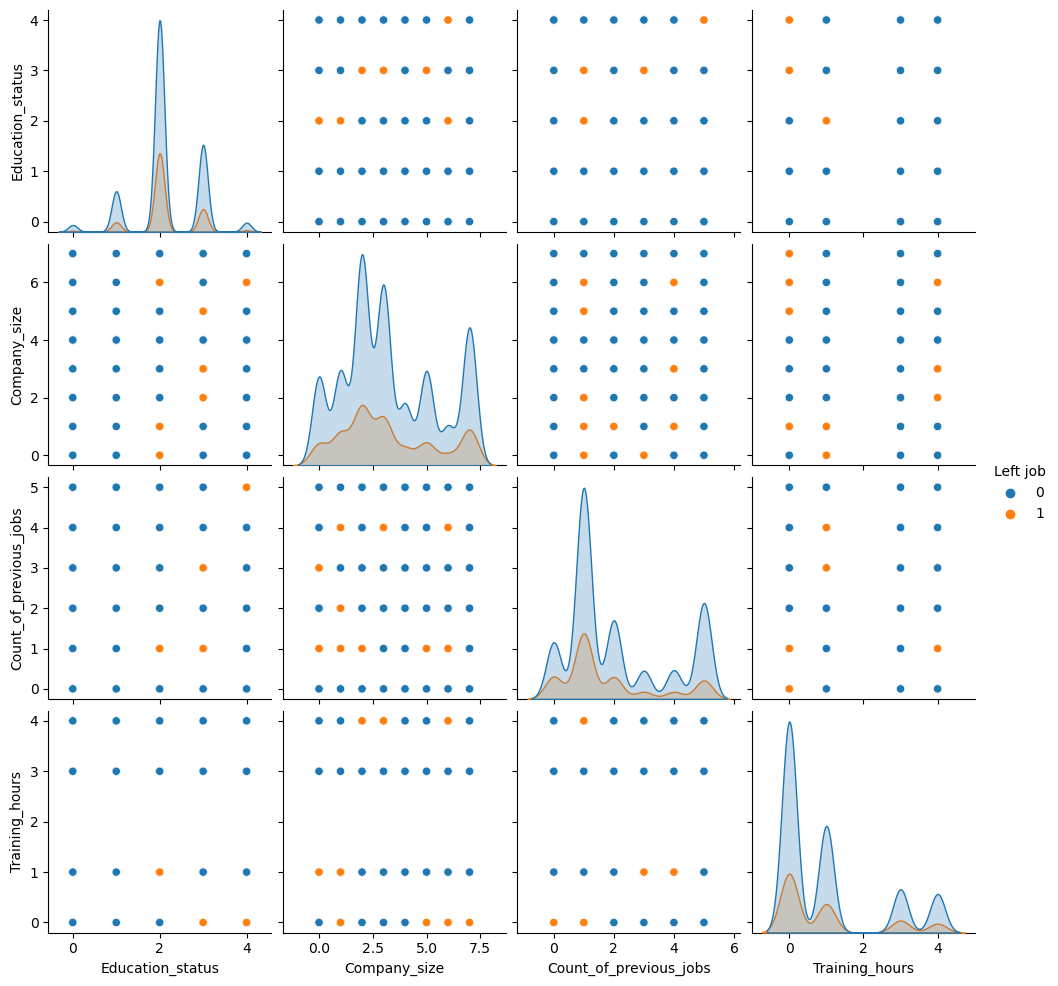

In [32]:
# Creating pairplots for target column

sns.pairplot(df,hue='Left job')

In [33]:
# We will split values to test and train to use machine learning algorithms

print(df_cat.values)

[[1 0 1 ... 2 5 0]
 [1 0 1 ... 2 0 1]
 [1 0 1 ... 2 0 1]
 ...
 [1 0 0 ... 2 4 0]
 [1 0 0 ... 4 2 1]
 [1 0 1 ... 4 1 3]]


In [34]:
# X is df_cat dataframe, y is 'Left job' column

X = df_cat.values
y = df.iloc[:, -5].values

In [35]:
# Importing the library

from sklearn.model_selection import train_test_split

In [36]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)

In [37]:
print(X_train)

[[1 0 0 ... 2 1 0]
 [1 0 0 ... 5 5 1]
 [0 0 0 ... 1 1 0]
 ...
 [1 0 0 ... 2 1 0]
 [1 0 0 ... 3 1 3]
 [1 0 0 ... 0 1 0]]


In [38]:
print(y_train)

[0 0 1 ... 0 0 1]


In [39]:
# We will implement machine learning models now

In [40]:
# Using K-Nearest-Neighour model (didn't work well for this dataset)

from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [45]:
print(confusion_matrix(y_test,pred))

[[3182  989]
 [ 964  359]]


In [46]:
# Precision is low

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      4171
           1       0.27      0.27      0.27      1323

    accuracy                           0.64      5494
   macro avg       0.52      0.52      0.52      5494
weighted avg       0.65      0.64      0.65      5494



In [64]:
#Using decision tree

from sklearn.tree import DecisionTreeClassifier

In [68]:
clf_en = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [69]:
y_pred_en = clf_en.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_en))

0.7591918456497998


In [71]:
print(clf_en.score(X_train, y_train))
print(clf_en.score(X_test, y_test))

0.7500195053444644
0.7591918456497998
